# **Analyzing Movie Data through Python**

# ** Importing Our Modules**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing Our Data Sets**
Below we are importing the data sets we will use into our Jupyter Notebook

## **Importing Our TN Movie Budgets CSV File**

Below we are importing our TN Movie Budget data set using pandas in a similar fashion to our IMDB CSV file.

In [3]:
tn_df = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 1/Phase_1_Project/Exploratory-Data-Analysis-Using-Movie-Data/seamus/Movie Project Data/tn.movie_budgets.csv')
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## **Some more cleaning**

First up, after seeing the new df3 table above, we can see that the 'production_budget', 'domestic_gross', and 'worldwide_gross' columns are listed as strings. Since we can't use strings to visualize data, we will clean them below by removing punctation and converting them from strings to integers

In [4]:
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '')
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',', '')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',', '')

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_70958/4067691972.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '')
/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_70958/4067691972.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '')
/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_70958/4067691972.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=Tr

In [5]:
tn_df = tn_df.astype({'production_budget':'int'})
tn_df = tn_df.astype({'domestic_gross':'int'})
tn_df = tn_df.astype({'worldwide_gross':'int'})

We also want to update the release date column into a datetime type so we can more easily use it.

In [6]:
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'], infer_datetime_format=True)

### **Return on Investment:**
Below we are creating a new column titled "Return on Investment" (ROI) so we can measure the return on investment on different types of films. Additionally, we are cleaning up our new column and dataframe by removing rows where ROI is 0. Given that this table is telling us that ROI is "0" might tell us that this data is wrong.

In [7]:
tn_df['return_on_investment'] = (tn_df['worldwide_gross']/tn_df['production_budget'])*100

In [8]:
# Removing ROI values that are $0.
tn_df = tn_df[tn_df['return_on_investment'] != 0]

### **Release Month**
We're also creating a "Release Month" column so we can measure across the time of the year

In [9]:
tn_df['release_month'] = pd.DatetimeIndex(tn_df['release_date']).month
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,653.257713,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,254.667286,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,42.789243,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,424.384139,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,415.369636,12
...,...,...,...,...,...,...,...,...
5775,76,2006-05-26,Cavite,7000,70071,71644,1023.485714,5
5776,77,2004-12-31,The Mongol King,7000,900,900,12.857143,12
5778,79,1999-04-02,Following,6000,48482,240495,4008.250000,4
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,26.760000,7


Now we can see how return on investment differs across months of the year

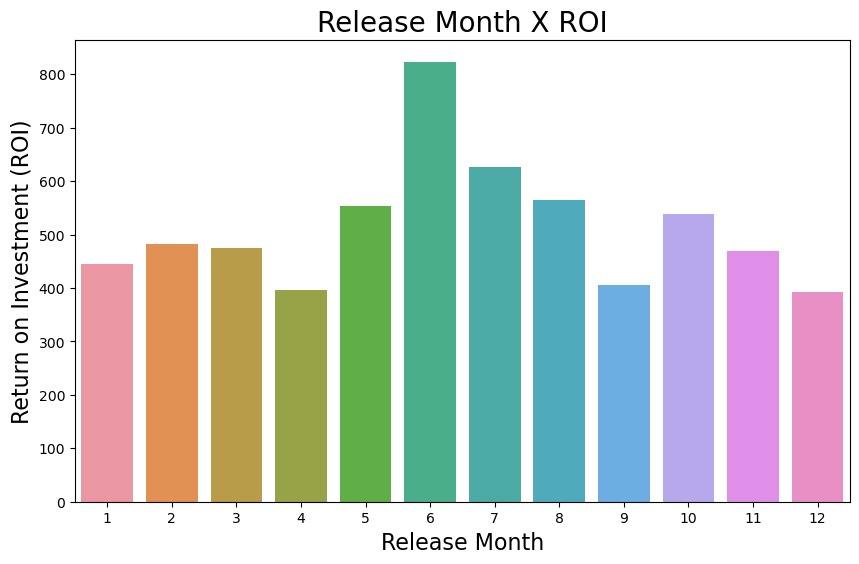

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="return_on_investment", errorbar = None, data=tn_df)
#roi_release_month.set(xlabel = 'Release Month', ylabel = 'Return on Investment (ROI)', title = 'Release Month X ROI')
plt.xlabel('Release Month', fontsize = 16)
plt.ylabel('Return on Investment (ROI)', fontsize = 16)
plt.title('Release Month X ROI', fontsize = 20)



plt.show()

It looks like July is the best month to release a movie based on ROI. However, there is a HUGE confidence interval. Let's see if we control for some outliers if it is still a good month for releases.

Below, we are creating a new column, "clean_roi", that has values that fall within the inter quartile range (IQR) of our return_on_investment column.

In [36]:
q1 = tn_df['return_on_investment'].quantile(0.25)
q3 = tn_df['return_on_investment'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Create a new column that contains only the non-outlier values
tn_df['clean_roi'] = tn_df.loc[(tn_df['return_on_investment'] >= lower_bound) & (tn_df['return_on_investment'] <= upper_bound), 'return_on_investment']
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,release_month,clean_roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,653.257713,12,653.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,254.667286,5,254.667286
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,42.789243,6,42.789243
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,424.384139,5,424.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,415.369636,12,415.369636


Now let's see if July is still a good month for a release, based on ROI.

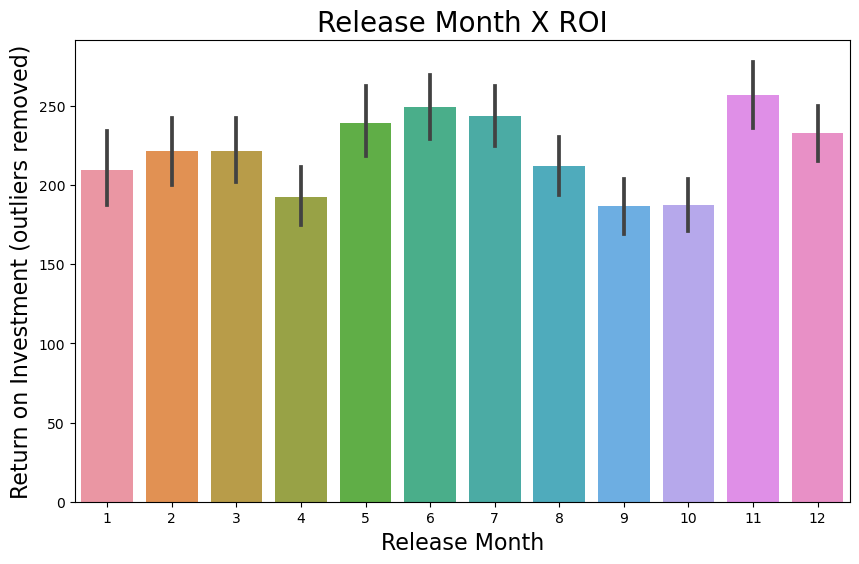

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="clean_roi", data=tn_df)
plt.xlabel('Release Month', fontsize = 16)
plt.ylabel('Return on Investment (outliers removed)', fontsize = 16)
plt.title('Release Month X ROI', fontsize = 20)
plt.show()

Looks like it's not the miracle we thought, but it still presents better ROI versus other months, with the potential for a "jackpot", considering the outliers in our other data.

Below is another look that includes a point plot.

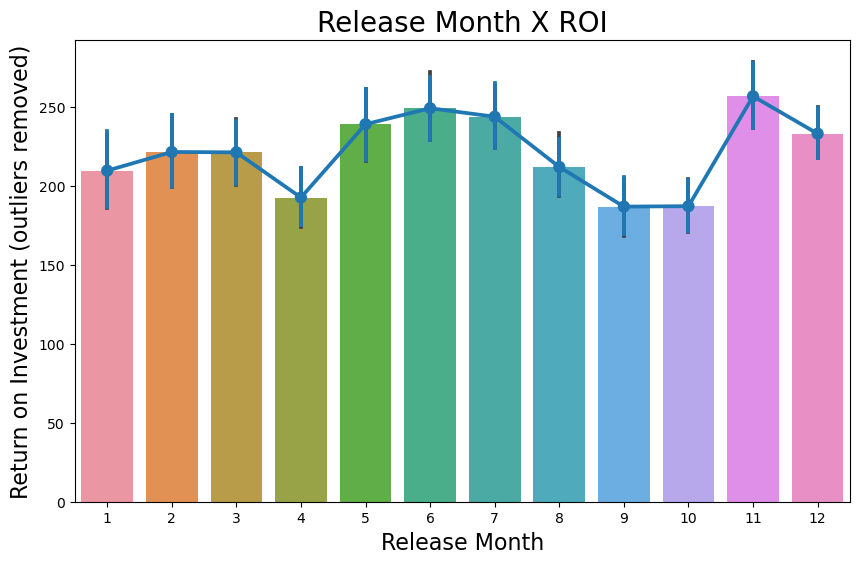

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar chart on the first axis
sns.barplot(x="release_month", y="clean_roi", data=tn_df)

sns.pointplot(x="release_month", y="clean_roi", data=tn_df)

plt.xlabel('Release Month', fontsize = 16)
plt.ylabel('Return on Investment (outliers removed)', fontsize = 16)
plt.title('Release Month X ROI', fontsize = 20)
plt.show()